In [ ]:
Import Required Labraries 

In [1]:
    import pip

    if int(pip.__version__.split('.')[0])>9:
        from pip._internal import main
    else:
        from pip import main
    def install(package):
        main(['install', package])

install('BeautifulSoup4') 
install('sklearn')
install('geopy')
install('geocoder')

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

/usr/lib/python3/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Libraries imported.


## Scrap data from Wikipedia page into a DataFrame

In [3]:
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Pune").text

In [4]:
soup = BeautifulSoup(data, 'html.parser')

In [5]:
neighborhoodList = []

In [6]:
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

In [7]:
Pune_df = pd.DataFrame({"Neighborhoods": neighborhoodList})

Pune_df.head()# Top 10 

,Neighborhoods
0,Appa Balwant Chowk
1,"Aundh, Pune"
2,Balewadi
3,Baner
4,Bavdhan


## Get the geographical coordinates

In [8]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Pune, Maharastra'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [9]:
coords = [ get_latlng(neighborhood) for neighborhood in Pune_df["Neighborhoods"].tolist() ]

Requested https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find?f=json&text=Appa+Balwant+Chowk%2C+Pune%2C+Maharastra&maxLocations=1
Requested https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find?f=json&text=Aundh%2C+Pune%2C+Pune%2C+Maharastra&maxLocations=1
Requested https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find?f=json&text=Balewadi%2C+Pune%2C+Maharastra&maxLocations=1
Requested https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find?f=json&text=Baner%2C+Pune%2C+Maharastra&maxLocations=1
Requested https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find?f=json&text=Bavdhan%2C+Pune%2C+Maharastra&maxLocations=1
Requested https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find?f=json&text=Bhavani+Peth%2C+Pune%2C+Pune%2C+Maharastra&maxLocations=1
Requested https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find?f=json&text=Blue+Ridge+Town+Pune%2C+Pune%2C+Maha

Requested https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find?f=json&text=Warje%2C+Pune%2C+Maharastra&maxLocations=1
Requested https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find?f=json&text=Yerawada%2C+Pune%2C+Maharastra&maxLocations=1


In [10]:
coords

[[18.516478861794244, 73.85386842926913],
 [18.563450000000046, 73.81227000000007],
 [18.576020000000028, 73.77983000000006],
 [18.548200000000065, 73.77316000000008],
 [18.517541553892233, 73.77852901740273],
 [18.512975860118864, 73.86528927407815],
 [18.581196108649767, 73.98546048802743],
 [18.516890000000046, 73.85617000000008],
 [18.512447939109023, 73.85657369435856],
 [18.494410000000073, 74.39857000000006],
 [18.515850000000057, 73.84061000000008],
 [18.46628000000004, 73.85326000000003],
 [18.447020000000066, 73.80757000000006],
 [18.509650000000022, 73.83124000000004],
 [18.505840000000035, 73.90232000000003],
 [18.514030000000048, 73.86287000000004],
 [18.503460000000075, 73.86432000000008],
 [18.50574000000006, 73.86137000000008],
 [18.502530000000036, 73.92706000000004],
 [18.591420000000028, 73.73895000000005],
 [18.54645000000005, 73.90067000000005],
 [18.52305000000007, 73.85825000000006],
 [18.544620000000066, 73.93922000000003],
 [18.535330000000044, 73.8938200000000

In [11]:
Pune_df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [12]:
Pune_df['Latitude'] = Pune_df_coords['Latitude']
Pune_df['Longitude'] = Pune_df_coords['Longitude']

In [13]:
print(Pune_df.shape)
Pune_df

(58, 3)


,Neighborhoods,Latitude,Longitude
0,Appa Balwant Chowk,18.516479,73.853868
1,"Aundh, Pune",18.563450,73.812270
2,Balewadi,18.576020,73.779830
3,Baner,18.548200,73.773160
4,Bavdhan,18.517542,73.778529
5,"Bhavani Peth, Pune",18.512976,73.865289
6,Blue Ridge Town Pune,18.581196,73.985460
7,"Budhwar Peth, Pune",18.516890,73.856170
8,"Chakan, Pune",18.512448,73.856574
9,Dapodi,18.494410,74.398570


In [14]:
Pune_df.to_csv("Pune_df.csv", index=False)

### Coordinates Of Pune

In [15]:
# get the coordinates of Pune
address = 'Pune, Maharastra'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Pune, Maharastra {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Pune, Maharastra 18.521428, 73.8544541.


In [16]:
# create map of Pune using latitude and longitude values
map_Pune = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(Pune_df['Latitude'],Pune_df['Longitude'],Pune_df['Neighborhoods']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_Pune)  
    
map_Pune

In [17]:
map_Pune.save('map_Pune.html')

### Use the Foursquare API to explore the neighborhoods

In [18]:
# define Foursquare Credentials and Version
CLIENT_ID = os.environ['CLIENT_ID'] # your Foursquare ID
CLIENT_SECRET = os.environ['CLIENT_SECRET'] # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RPQ01VHKTD22BA1TVYZWPH23VHGUYAZUWLMEMEVXNIEFK33S
CLIENT_SECRET:Q2CMATDRGJYPG05O0BGJYTYRLHUIZ0ZA43SPTSQJ5SY0NQXG


In [19]:
def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [199]:
explore_df_list = []

for i, nbd_name in enumerate(Pune_df['Neighborhoods']):  
    
    try :
        ### Getting the data of neighbourhood
        nbd_name = Pune_df.loc[i,'Neighborhoods']
        nbd_lat = Pune_df.loc[i, 'Latitude']
        nbd_lng = Pune_df.loc[i, 'Longitude']

        radius = 1500 # Setting the radius as 1000 metres
        LIMIT = 100 # Getting the top 30 venues

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nbd_lat, nbd_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flattens JSON

        # Filtering the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Renaming the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Gets the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Gets the data required
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nbd_name, nbd_lat, nbd_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

/home/rishabhdas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [200]:
explore_df = pd.DataFrame([item for item in explore_df_list])
explore_df.columns = ['Neighborhoods', 'Neighborhoods Latitude', 'Neighborhoods Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_df.head()

,Neighborhoods,Neighborhoods Latitude,Neighborhoods Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,Appa Balwant Chowk,18.516479,73.853868,Sujata Mastani,Ice Cream Shop,18.511793,73.852145
1,Appa Balwant Chowk,18.516479,73.853868,Bhagat Tarachand,Indian Restaurant,18.514332,73.851317
2,Appa Balwant Chowk,18.516479,73.853868,Hotel Madhuban,Tea Room,18.519248,73.848688
3,Appa Balwant Chowk,18.516479,73.853868,Raja Dinkar Kelkar museum,History Museum,18.510744,73.854389
4,Appa Balwant Chowk,18.516479,73.853868,Lal Mahal,Historic Site,18.518720,73.856556


### Analyze Each Neighborhood

In [201]:
# One hot encoding
Pune_onehot = pd.get_dummies(explore_df[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
Pune_onehot['Neighborhoods'] = explore_df['Neighborhoods'] 

# Move neighborhood column to the first column
fixed_columns = [Pune_onehot.columns[-1]] + Pune_onehot.columns[:-1].values.tolist()
Pune_onehot = Pune_onehot[fixed_columns]

Pune_onehot.head()

,Neighborhoods,ATM,Accessories Store,Airport Service,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Badminton Court,Bakery,Bar,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Casino,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distillery,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gastropub,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Mountain,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue,Nightclub,North Indian Restaurant,Opera House,Organic Grocery,Other Nightlife,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Racetrack,Recreation Center,Rental Car Location,Resort,Restaurant,Road,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Track Stadium,Trail,Train Station,Vegetarian / Vegan Restaurant,Watch Shop,Women's Store,Yoga Studio,Zoo
0,Appa Balwant Chowk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Appa Balwant Chowk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Appa Balwant Chowk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Appa Balwant Chowk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Appa Balwant Chowk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

##### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [202]:
Pune_grouped = Pune_onehot.groupby('Neighborhoods').mean().reset_index()
Pune_grouped.head()

,Neighborhoods,ATM,Accessories Store,Airport Service,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Badminton Court,Bakery,Bar,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Casino,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distillery,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gastropub,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Mountain,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue,Nightclub,North Indian Restaurant,Opera House,Organic Grocery,Other Nightlife,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Racetrack,Recreation Center,Rental Car Location,Resort,Restaurant,Road,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Track Stadium,Trail,Train Station,Vegetarian / Vegan Restaurant,Watch Shop,Women's Store,Yoga Studio,Zoo
0,Appa Balwant Chowk,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.011765,0.0,0.023529,0.011765,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.023529,0.0,0.000000,0.0,0.035294,0.0,0.0,0.0,0.011765,0.000000,0.00000,0.000000,0.023529,0.0,0.0,0.011765,0.000000,0.0,0.0,0.000000,0.070588,0.0,0.000000,0.0,0.011765,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.047059,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.011765,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.011765,0.0,0.011765,0.011765,0.011765,0.011765,0.000000,0.0,0.0,0.035294,0.0,0.211765,0.0,0.000000,0.0,0.0,0.011765,0.023529,0.0,0.000000,0.0,0.0,0.000000,0.023529,0.000000,0.0,0.011765,0.000000,0.000000,0.0,0.0,0.0,0.011765,0.000000,0.0,0.0,0.011765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011765,0.011765,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.023529,0.0,0.0,0.011765,0.0,0.023529,0.0,0.000000,0.000000,0.000000,0.047059,0.000000,0.011765,0.0,0.011765,0.000000,0.000000,0.011765,0.011765,0.0,0.0,0.035294,0.0,0.0,0.011765,0.0,0.0,0.0,0.0,0.0,0.082353,0.0,0.0,0.0,0.0
1,"Aundh, Pune",0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.012195,0.0,0.036585,0.000000,0.0,0.000000,0.000000,0.012195,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.012195,0.0,0.036585,0.0,0.0,0.0,0.024390,0.012195,0.02439,0.012195,0.036585,0.0,0.0,0.000000,0.012195,0.0,0.0,0.012195,0.060976,0.0,0.012195,0.0,0.012195,0.012195,0.0,0.012195,0.012195,0.0,0.0,0.0,0.036585,0.000000,0.012195,0.012195,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.012195,0.024390,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.012195,0.0,0.0,0.024390,0.0,0.170732,0.0,0.012195,0.0,0

### Creating a function to return the most common venues

In [203]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Create a new dataframe to get the top 10 venues

In [204]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighborhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
Neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
Neighborhoods_venues_sorted['Neighborhoods'] = Pune_grouped['Neighborhoods']

for ind in np.arange(Pune_grouped.shape[0]):
     Neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Pune_grouped.iloc[ind, :], num_top_venues)

Neighborhoods_venues_sorted.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Appa Balwant Chowk,Indian Restaurant,Vegetarian / Vegan Restaurant,Dessert Shop,Fast Food Restaurant,Snack Place,Tea Room,Café,Ice Cream Shop,Seafood Restaurant,Restaurant
1,"Aundh, Pune",Indian Restaurant,Dessert Shop,Restaurant,Shopping Mall,Coffee Shop,Bakery,Fast Food Restaurant,Café,Snack Place,Gym
2,Balewadi,Indian Restaurant,Café,Asian Restaurant,Fast Food Restaurant,Ice Cream Shop,Brewery,Chinese Restaurant,Shopping Mall,Seafood Restaurant,Sandwich Place
3,Baner,Indian Restaurant,Department Store,Vegetarian / Vegan Restaurant,Ice Cream Shop,Beer Garden,Convenience Store,Coffee Shop,Mountain,Food,Café
4,Bavdhan,Indian Restaurant,Café,Smoke Shop,Fast Food Restaurant,Asian Restaurant,Restaurant,Bakery,Pool,Shop & Service,Sandwich Place


### Setting the dataframe for k-means clustering to operate on

In [205]:
Pune_grouped_clustering = Pune_grouped.drop('Neighborhoods', 1)

### Using K-Means clustering

In [206]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [207]:
max_range = 20

In [208]:
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    Pgc = Pune_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(Pgc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(Pgc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

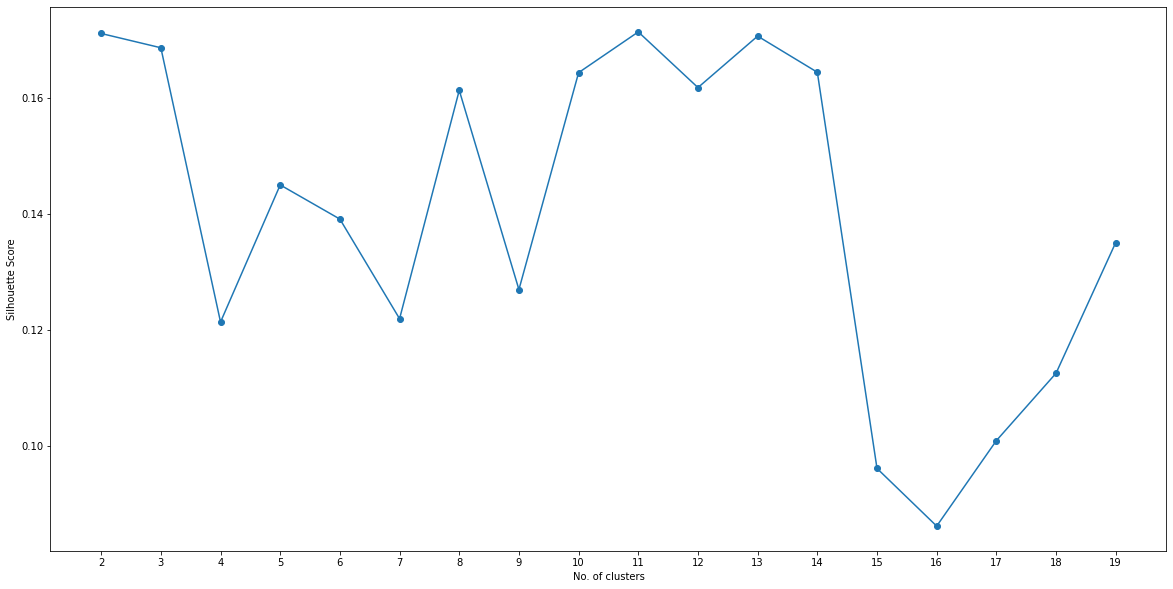

In [209]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [210]:
opt = np.argmax(scores) + 2 # Finds the optimal value
opt

11

### K-Means clustering for the optimal number of clusters

In [211]:
kclusters = opt

# Run k-means clustering
Pgc = Pune_grouped_clustering
kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit(Pgc)


In [212]:
# Add clustering labels
Neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

## Cluster Examine

In [213]:
Pune_merged = Pune_df
Pune_merged = Pune_merged.join(Neighborhoods_venues_sorted.set_index('Neighborhoods'), on='Neighborhoods')
Pune_merged.dropna(inplace = True)
Pune_merged['Cluster Labels'] = Pune_merged['Cluster Labels'].astype(int)
Pune_merged.head()

,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Appa Balwant Chowk,18.516479,73.853868,0,Indian Restaurant,Vegetarian / Vegan Restaurant,Dessert Shop,Fast Food Restaurant,Snack Place,Tea Room,Café,Ice Cream Shop,Seafood Restaurant,Restaurant
1,"Aundh, Pune",18.563450,73.812270,1,Indian Restaurant,Dessert Shop,Restaurant,Shopping Mall,Coffee Shop,Bakery,Fast Food Restaurant,Café,Snack Place,Gym
2,Balewadi,18.576020,73.779830,1,Indian Restaurant,Café,Asian Restaurant,Fast Food Restaurant,Ice Cream Shop,Brewery,Chinese Restaurant,Shopping Mall,Seafood Restaurant,Sandwich Place
3,Baner,18.548200,73.773160,0,Indian Restaurant,Department Store,Vegetarian / Vegan Restaurant,Ice Cream Shop,Beer Garden,Convenience Store,Coffee Shop,Mountain,Food,Café
4,Bavdhan,18.517542,73.778529,1,Indian Restaurant,Café,Smoke Shop,Fast Food Restaurant,Asian Restaurant,Restaurant,Bakery,Pool,Shop & Service,Sandwich Place


### Top 3 Common Places

In [273]:
from collections import Counter
def most_common(lst):
    data = Counter(lst)
    return max(lst, key=data.get)

In [274]:
common_places = []

In [275]:
common_places.append(most_common(Pune_merged['1st Most Common Venue']))
common_places.append(most_common(Pune_merged['2nd Most Common Venue']))
common_places.append(most_common(Pune_merged['3rd Most Common Venue']))

In [276]:
common_places

['Indian Restaurant', 'Snack Place', 'Ice Cream Shop']

### Being in India most common Place would be Indian Resturant, Hence Ignoring it!!

In [277]:
if 'Indian Restaurant' in common_places:
    common_places.remove('Indian Restaurant')
    common_places.append(most_common(Pune_merged['4th Most Common Venue']))

In [278]:
common_places

['Snack Place', 'Ice Cream Shop', 'Fast Food Restaurant']

### Creating Map Based On Different Cluster

In [215]:
# Create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Pune_merged['Latitude'],Pune_merged['Longitude'],Pune_merged['Neighborhoods'],Pune_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

In [216]:
Pune_merged.columns

Index(['Neighborhoods', 'Latitude', 'Longitude', 'Cluster Labels',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

### Cluster-0

In [281]:
Pune_merged.loc[Pune_merged['Cluster Labels']==0, Pune_merged.columns[[0] + list(range(3,Pune_merged.shape[1]))]]

,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Appa Balwant Chowk,0,Indian Restaurant,Vegetarian / Vegan Restaurant,Dessert Shop,Fast Food Restaurant,Snack Place,Tea Room,Café,Ice Cream Shop,Seafood Restaurant,Restaurant
3,Baner,0,Indian Restaurant,Department Store,Vegetarian / Vegan Restaurant,Ice Cream Shop,Beer Garden,Convenience Store,Coffee Shop,Mountain,Food,Café
5,"Bhavani Peth, Pune",0,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Snack Place,Shopping Mall,Vegetarian / Vegan Restaurant,Coffee Shop,Breakfast Spot,Department Store,Dessert Shop
7,"Budhwar Peth, Pune",0,Indian Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Snack Place,Ice Cream Shop,Dessert Shop,Tea Room,Seafood Restaurant,Café,Maharashtrian Restaurant
8,"Chakan, Pune",0,Indian Restaurant,Snack Place,Ice Cream Shop,Vegetarian / Vegan Restaurant,Dessert Shop,Coffee Shop,Theater,Fast Food Restaurant,Restaurant,Historic Site
10,Deccan Gymkhana,0,Indian Restaurant,Snack Place,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Pizza Place,Seafood Restaurant,Restaurant,Ice Cream Shop,Coffee Shop,Burger Joint
15,"Ganesh Peth, Pune",0,Indian Restaurant,Snack Place,Seafood Restaurant,Ice Cream Shop,Vegetarian / Vegan Restaurant,Jewelry Store,Dessert Shop,Café,Historic Site,Bakery
16,"Ghorpade Peth, Pune",0,Fast Food Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Dessert Shop,Coffee Shop,Shopping Mall,Snack Place,Multiplex,Garden,Movie Theater
17,"Guruwar Peth, Pune",0,Indian Restaurant,Vegetarian / Vegan Restaurant,Dessert Shop,Fast Food Restaurant,Ice Cream Shop,Snack Place,Coffee Shop,Jewelry Store,Men's Store,Shopping Mall
18,Hadapsar,0,Indian Restaurant,Fast Food Restaurant,Coffee Shop,Ice Cream Shop,Bakery,Gym,Middle Eastern Restaurant,Pizza Place,Chinese Restaurant,Café


### Cluster- 1

In [285]:
Pune_merged.loc[Pune_merged['Cluster Labels']==1, Pune_merged.columns[[0] + list(range(3,Pune_merged.shape[1]))]]

,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Aundh, Pune",1,Indian Restaurant,Dessert Shop,Restaurant,Shopping Mall,Coffee Shop,Bakery,Fast Food Restaurant,Café,Snack Place,Gym
2,Balewadi,1,Indian Restaurant,Café,Asian Restaurant,Fast Food Restaurant,Ice Cream Shop,Brewery,Chinese Restaurant,Shopping Mall,Seafood Restaurant,Sandwich Place
4,Bavdhan,1,Indian Restaurant,Café,Smoke Shop,Fast Food Restaurant,Asian Restaurant,Restaurant,Bakery,Pool,Shop & Service,Sandwich Place
13,Erandwane,1,Indian Restaurant,Café,Pizza Place,Vegetarian / Vegan Restaurant,Bistro,Fast Food Restaurant,Seafood Restaurant,Snack Place,Ice Cream Shop,Multiplex
14,Fatimanagar,1,Indian Restaurant,Pizza Place,Café,Nightclub,Chinese Restaurant,Garden,Multiplex,Shopping Mall,Racetrack,Electronics Store
20,Kalyani Nagar,1,Indian Restaurant,Café,Pub,Bakery,Fast Food Restaurant,Lounge,BBQ Joint,Italian Restaurant,Restaurant,Dim Sum Restaurant
22,Kharadi,1,Hotel,Indian Restaurant,Ice Cream Shop,Fruit & Vegetable Store,Pizza Place,Hookah Bar,Coffee Shop,Multicuisine Indian Restaurant,Eastern European Restaurant,Restaurant
23,Koregaon Park,1,Indian Restaurant,Italian Restaurant,Café,Hotel,Bakery,Lounge,Chinese Restaurant,Pub,Restaurant,Burger Joint
24,Kothrud,1,Indian Restaurant,Café,Breakfast Spot,Dessert Shop,Ice Cream Shop,Fast Food Restaurant,Diner,Snack Place,Pizza Place,Sandwich Place
26,"Maan, Pune",1,Indian Restaurant,Café,Italian Restaurant,Athletics & Sports,Lounge,BBQ Joint,Fast Food Restaurant,Pub,Bakery,Ice Cream Shop


### Cluster-2

In [219]:
Pune_merged.loc[Pune_merged['Cluster Labels']==2, Pune_merged.columns[[0] + list(range(3,Pune_merged.shape[1]))]]

,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
49,"Sus, Pune",2,Café,Hotel,Bar,Indian Restaurant,Resort,North Indian Restaurant,Food & Drink Shop,Food,Fast Food Restaurant,Farmers Market


### Cluster-3

In [220]:
Pune_merged.loc[Pune_merged['Cluster Labels']==3, Pune_merged.columns[[0] + list(range(3,Pune_merged.shape[1]))]]

,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
56,Warje,3,Department Store,Bowling Alley,Coffee Shop,Bar,Falafel Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Fast Food Restaurant


### Cluster-4

In [221]:
Pune_merged.loc[Pune_merged['Cluster Labels']==4, Pune_merged.columns[[0] + list(range(3,Pune_merged.shape[1]))]]

,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Hinjawadi,4,Hotel,Indian Restaurant,Restaurant,Fast Food Restaurant,Café,IT Services,Food Truck,Ice Cream Shop,Lounge,Multiplex
30,Marunji,4,Hotel,Fast Food Restaurant,Food Truck,Indian Restaurant,Restaurant,Multiplex,Café,Mexican Restaurant,Department Store,Sandwich Place


###  Cluster-5

In [222]:
Pune_merged.loc[Pune_merged['Cluster Labels']==5, Pune_merged.columns[[0] + list(range(3,Pune_merged.shape[1]))]]

,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Blue Ridge Town Pune,5,Indian Restaurant,Snack Place,IT Services,Diner,Sandwich Place,Restaurant,English Restaurant,Food & Drink Shop,Food,Fast Food Restaurant


###  Cluster-6

In [223]:
Pune_merged.loc[Pune_merged['Cluster Labels']==6, Pune_merged.columns[[0] + list(range(3,Pune_merged.shape[1]))]]

,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Dhayari,6,Diner,Bus Station,Bus Stop,Restaurant,Zoo,Exhibit,Food & Drink Shop,Food,Fast Food Restaurant,Farmers Market


###  Cluster-7

In [224]:
Pune_merged.loc[Pune_merged['Cluster Labels']==7, Pune_merged.columns[[0] + list(range(3,Pune_merged.shape[1]))]]

,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,"Nanded City, Pune",7,ATM,Diner,Market,Mobile Phone Shop,Pizza Place,Dim Sum Restaurant,Falafel Restaurant,Food Court,Food & Drink Shop,Food


###  Cluster-8

In [225]:
Pune_merged.loc[Pune_merged['Cluster Labels']==8, Pune_merged.columns[[0] + list(range(3,Pune_merged.shape[1]))]]

,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
48,Sopan Baug,8,Fast Food Restaurant,Indian Restaurant,Ice Cream Shop,Shopping Mall,Food Court,Department Store,Breakfast Spot,Bus Stop,Multiplex,Bakery
51,Vadgaon Budruk,8,Fast Food Restaurant,Bakery,Indian Restaurant,Ice Cream Shop,Breakfast Spot,Pizza Place,Diner,Opera House,Multiplex,Restaurant


###  Cluster-9

In [226]:
Pune_merged.loc[Pune_merged['Cluster Labels']==9, Pune_merged.columns[[0] + list(range(3,Pune_merged.shape[1]))]]

,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Dhankawadi,9,Breakfast Spot,Snack Place,Zoo,Convenience Store,Coffee Shop,Exhibit,Café,Food,Dessert Shop,Gym
57,Yerawada,9,Tea Room,Breakfast Spot,Chinese Restaurant,Shopping Mall,South Indian Restaurant,Food Truck,Fast Food Restaurant,Snack Place,Pizza Place,Dessert Shop


###  Cluster-10

In [227]:
Pune_merged.loc[Pune_merged['Cluster Labels']==10, Pune_merged.columns[[0] + list(range(3,Pune_merged.shape[1]))]]

,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
53,Vishrantwadi,10,Fast Food Restaurant,Playground,Dessert Shop,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Gastropub,Chinese Restaurant,Electronics Store,Food


## Observation:

Analysing the Food Chain Structure in Pune, Maharastra I have observed the below mention details:

1. Most common food Store are 'Snack Place', 'Ice Cream Shop', 'Fast Food Restaurant'. Being in India, Indian Restaurants are in abundance, hence ignoring them.

2. There are clusters which doesn't have Ice cream Shop.

3. As observed from the cluster data, Ice cream Shop are not available in some clusters. People from those clusters may be travel to their Neighbourhood places for Ice Cream.

4. This is an opportunity to open up an Ice Cream Parlor in one of those clusters and attract Ice Cream lovers from those specific areas.

5. The following additional information can also be considered to narrow down on the specific Neighbourhood
    - Population in the specific Cluster/Neighbourhood
    - Categorize people based on student/professionals/senior-citizens
    - Area cost can be taken into consideration to understand the initial investment required to start a business.











